### Yes, there are some restrictions and limitations when using Mathematica (Wolfram Engine) in JupyterLab, compared to the full Mathematica GUI. Here’s what you should know:

🔹 1. No Graphical User Interface (GUI Features Missing)
You cannot use the notebook interface features like:

Dynamic interactivity (e.g., Manipulate[] sliders may not work properly).

Clickable buttons.

Docked palettes.

✔ Workaround
Use Jupyter Widgets or Wolfram Cloud for interactive UI elements.

🔹 2. Limited Graphics Display
Plots and graphics might not render correctly inside Jupyter.

Some 3D graphics may not display at all.

✔ Workaround
Use:

wolfram
Copy
Edit
Export["plot.png", Plot[Sin[x], {x, 0, 10}]]
Then display it:

wolfram
Copy
Edit
Import["plot.png"]
🔹 3. No Front-End Specific Functions
Functions like CreateDialog[], NotebookWrite[], or PaletteNotebook[] won’t work because Jupyter does not support the Mathematica Front-End.

✔ Workaround
Use Print[] or TextCell[] instead.

🔹 4. Licensing Restrictions
If you're using Wolfram Engine (free version) in Jupyter, it is only for non-commercial use.

Some advanced machine learning and symbolic computation features require a paid license.

✔ Workaround
If you need full functionality, consider Wolfram Cloud or a licensed Mathematica installation.

🔹 5. Slower Performance Compared to Native Mathematica
Jupyter notebooks might be slower when handling large computations, especially with symbolic algebra.

Some asynchronous computations (like ParallelTable[]) may not behave as expected.

✔ Workaround
Try using Compile[] or ParallelEvaluate[] for speed improvements.

Summary of Mathematica in JupyterLab:
Feature	Works in Jupyter?	Workaround
Basic Computation	✅ Yes	-
Symbolic Math	✅ Yes	-
Plots (2D)	⚠️ Limited	Export & Import images
Plots (3D)	❌ No (in some cases)	Export graphics
Manipulate[]	❌ No	Use Jupyter widgets
GUI Functions	❌ No	Use Print[] or TextCell[]
Parallel Computing	⚠️ Limited	Use ParallelEvaluate[]
Commercial Use (Free)	❌ No	Requires paid license
Would you like help setting up a better Mathematica workflow in Jupyter? 🚀








You said:
Jupyter Widgets
ChatGPT said:
Jupyter Widgets in Mathematica (Wolfram Language)
Jupyter Widgets allow you to create interactive elements like sliders, buttons, and dropdowns inside Jupyter Notebooks. However, Mathematica’s Manipulate[] does not work in Jupyter, so you need to use alternatives.

🔹 1. Using EchoEvaluationCell for Live Outputs
Mathematica does not support native Jupyter Widgets, but you can use:

wolfram
Copy
Edit
EchoEvaluationCell[Plot[Sin[x], {x, 0, 10}]]
This forces real-time updates inside Jupyter.

🔹 2. Using Dynamic[] (⚠ Limited in Jupyter)
Normally, Dynamic[] is used for interactivity, but in Jupyter, it does not auto-refresh:

wolfram
Copy
Edit
Dynamic[DateString[]]
✔ Workaround: Use Refresh[]:

wolfram
Copy
Edit
Dynamic[Refresh[DateString[], UpdateInterval -> 1]]
This updates every second.

🔹 3. Creating Sliders (Manual Execution Required)
Mathematica’s Manipulate[] does NOT work in Jupyter, but you can use Slider[]:

wolfram
Copy
Edit
Slider[Dynamic[x], {0, 10}]
However, you must re-run the cell manually to update values.

🔹 4. Using Python Jupyter Widgets with Wolfram Engine
If you need true interactivity, combine Python's ipywidgets with Mathematica:

1️⃣ Install ipywidgets (if not already installed):

bash
Copy
Edit
pip install ipywidgets
2️⃣ Import and use Python widgets:

python
Copy
Edit
import ipywidgets as widgets
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl

session = WolframLanguageSession()

def compute(value):
    return session.evaluate(wl.Plot(wl.Sin(wl.x * value), wl.x, 0, 10))

slider = widgets.FloatSlider(min=0, max=10, step=0.1, value=1)
widgets.interactive(compute, value=slider)
This method requires Python + Wolfram Engine but fully works inside Jupyter.

🛠️ Best Practices for Interactivity in Jupyter + Mathematica
Feature	Works in Jupyter?	Alternative
Manipulate[]	❌ No	Use Python Jupyter Widgets
Dynamic[]	⚠ Partially	Use Refresh[]
Slider[]	✅ Yes	Requires manual re-run
EchoEvaluationCell	✅ Yes	Best for live updates
Would you like a full example of interactive Wolfram-Python integration? 🚀









## Using Python Jupyter Widgets (ipywidgets)
Jupyter Widgets (ipywidgets) allow you to create interactive UI elements like sliders, buttons, dropdowns, and more inside Jupyter Notebooks.

🔹 1. Install ipywidgets (If Not Installed)
Run the following command in a Jupyter Notebook or terminal:

bash
Copy
Edit
pip install ipywidgets
Then, enable it for Jupyter:

bash
Copy
Edit
jupyter nbextension enable --py widgetsnbextension
For JupyterLab, also install:

bash
Copy
Edit
jupyter labextension install @jupyter-widgets/jupyterlab-manager
🔹 2. Import ipywidgets
In your Jupyter Notebook, import the library:

python
Copy
Edit
import ipywidgets as widgets
from IPython.display import display
🔹 3. Create a Simple Slider
python
Copy
Edit
slider = widgets.IntSlider(value=5, min=0, max=10, step=1, description="Value:")
display(slider)
This creates an interactive slider that ranges from 0 to 10.

🔹 4. Use interact() for Quick Interactivity
The interact() function automatically creates widgets for function arguments:

python
Copy
Edit
from ipywidgets import interact

def square(x):
    return x ** 2

interact(square, x=(0, 10))
Moves a slider from 0 to 10, displaying x² in real time.

🔹 5. Using Multiple Widgets (interactive())
For more customization:

python
Copy
Edit
from ipywidgets import interactive

def compute(a, b):
    return f"Sum: {a + b}, Product: {a * b}"

widgets_ui = interactive(compute, a=(1, 10), b=(1, 10))
display(widgets_ui)
Creates two sliders for a and b.

🔹 6. Using Buttons with Click Events
python
Copy
Edit
button = widgets.Button(description="Click Me")

def on_button_click(b):
    print("Button Clicked!")

button.on_click(on_button_click)
display(button)
Clicking the button prints "Button Clicked!".

🔹 7. Dropdowns and Text Inputs
python
Copy
Edit
dropdown = widgets.Dropdown(
    options=['Apple', 'Banana', 'Cherry'],
    description='Fruit:',
)

text = widgets.Text(
    description='Name:',
    placeholder='Type something...',
)

display(dropdown, text)
🔹 8. Layout and Styling
Widgets can be arranged horizontally or vertically:

python
Copy
Edit
box = widgets.HBox([widgets.Label("Select:"), slider, button])
display(box)
HBox() arranges widgets horizontally.

VBox() arranges widgets vertically.

🔹 9. Using Widgets with Wolfram Engine (Mathematica)
You can integrate Wolfram Engine with Python inside Jupyter:

python
Copy
Edit
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl

session = WolframLanguageSession()

def compute(value):
    return session.evaluate(wl.Plot(wl.Sin(wl.x * value), wl.x, 0, 10))

interact(compute, value=(0.1, 10, 0.1))
Moves a slider to change a Mathematica-generated plot dynamically.

🛠️ Summary of ipywidgets Usage
Feature	Example
Slider	widgets.IntSlider()
Button	widgets.Button()
Dropdown	widgets.Dropdown()
Text Input	widgets.Text()
Auto Widgets	interact(function, x=(min, max))
Custom UI	interactive(function, args...)
Layout	HBox(), VBox()
Would you like an example specific to your use case? 🚀

-Graphics-
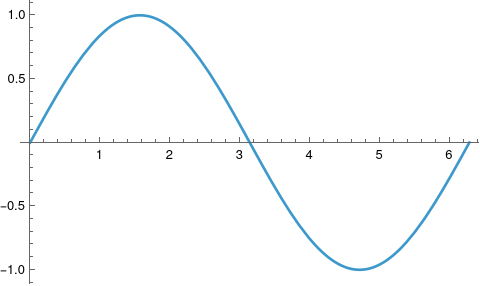

In [1]:
Plot[Sin[x], {x, 0, 2 Pi}]

-Graphics-
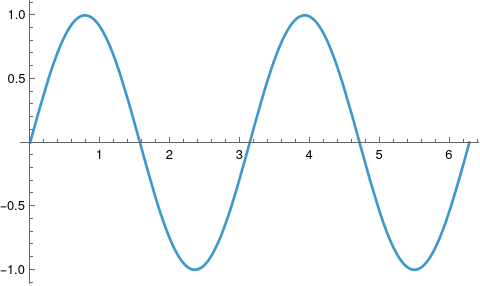

In [1]:
Plot[Sin[2x],{x,0,2*Pi}]

In [6]:
5+3


8

In [16]:
% +2

2 + hashlib import

Log[4096]
---------
 Log[10]
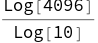

In [31]:
Log10[2^12]

In [21]:
5+9

14

In [41]:
ScientificForm[2^12]

4096

EchoEvaluationCell[-Graphics-]
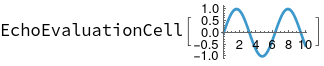

In [46]:
EchoEvaluationCell[Plot[Sin[x], {x, 0, 10}]]

### Start a Wolfram kernel in JupyterLab and test basic interactivity:

mathematica
Copy
(* Example: Simple slider in Mathematica *)
Manipulate[Plot[Sin[a x], {x, 0, 2 Pi}], {a, 1, 5}]

Manipulate[Plot[Sin[a x], {x, 0, 2 Pi}], {a, 1, 5}]
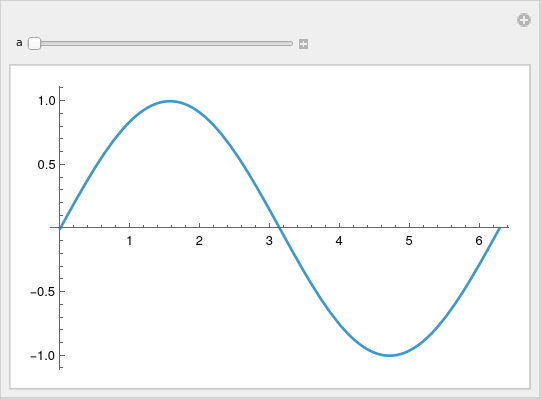

In [12]:
(* Example: Simple slider in Mathematica *)
Manipulate[Plot[Sin[a x], {x, 0, 2 Pi}], {a, 1, 5}]



### Native Manipulate won’t work in JupyterLab (no front-end). Use workarounds below.

### Workarounds for Interactivity
Since Mathematica's Manipulate doesn’t work in JupyterLab, use these alternatives:
# it works just above

(a) Static Precomputed Plots
mathematica
Copy
(* Generate a grid of plots for different parameters *)
aValues = Range[1, 5];
plots = Table[Plot[Sin[a x], {x, 0, 2 Pi}], {a, aValues}];
GraphicsGrid[Partition[plots, 2]]

-Graphics-
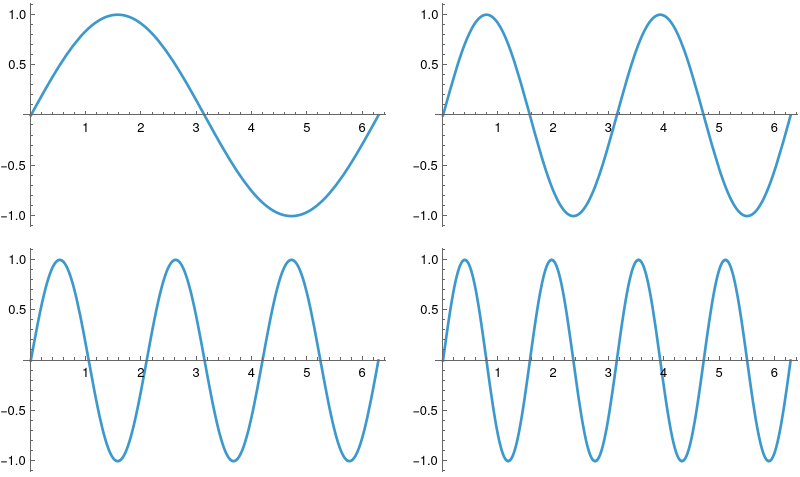

In [1]:
aValues = Range[1, 5];
plots = Table[Plot[Sin[a x], {x, 0, 2 Pi}], {a, aValues}];
GraphicsGrid[Partition[plots, 2]]

Export to HTML/JS (Advanced)
Use WolframScript to export dynamic content to HTML/JS and embed it in Jupyter:

mathematica
Copy
Export["plot.html", Manipulate[Plot[Sin[a x], {x, 0, 2 Pi}], {a, 1, 5}]]

In [22]:
Export["plot.html", Manipulate[Plot[Sin[a x], {x, 0, 2 Pi}], {a, 1, 5}]]

plot.html

Then display it in JupyterLab:

python
Copy
# In a Jupyter cell (Python kernel)
from IPython.display import HTML
HTML(filename="plot.html")

Use Python Widgets + Mathematica (Hybrid)
Compute data in Mathematica:

mathematica
Copy
data = Table[{x, Sin[x]}, {x, 0, 2 Pi, 0.1}];
Export["data.csv", data]

In [51]:
data = Table[{x, Sin[x]}, {x, 0, 2 Pi, 0.1}];
Export["data.csv", data]

data.csv

-Graphics-
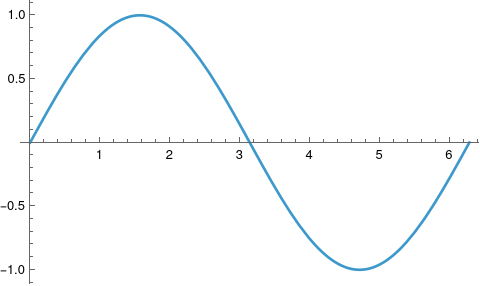

In [1]:
Plot[Sin[x], {x, 0, 2 Pi}]

In [6]:
4!

24

In [16]:
N[11!]

7
3.99168 10